In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [2]:
from keras.models import load_model

pretrained_model = load_model("MobileNetV3Large.keras")

/Users/vpedos/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import random

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

# import coremltools

# Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
# from tensorflow.keras.layers.experimental import preprocessing

from tensorflow.keras.applications import MobileNetV3Large
from keras.layers import Conv2D , MaxPool2D , Input , GlobalAveragePooling2D ,AveragePooling2D, Dense , Dropout ,Activation, Flatten , BatchNormalization

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint



from tensorflow.keras import Model



In [4]:
pretrained_model

<Functional name=MobilenetV3large, built=True>

In [6]:
TRAIN_DIR = 'plant_leave_disease_dataset/Apricot/train'
TEST_DIR = 'plant_leave_disease_dataset/Apricot/test'

train_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

test_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

In [7]:
# Split the data into three categories.
train_images = train_generator.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    # batch_size=8,
    shuffle=True,
    seed=42
)

test_images = test_generator.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    # batch_size=1,
    shuffle=False
)

Found 215 images belonging to 2 classes.
Found 55 images belonging to 2 classes.


In [8]:
# Resize Layer
resize_and_rescale = keras.Sequential([
  layers.Resizing(224,224),
  layers.Rescaling(1./255),
])

# Setup data augmentation
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.03)                      
], name="data_augmentation")

In [8]:
print(len(train_images))
print(len(val_images))

22
6


In [9]:
pretrained_model.trainable = False

In [10]:
# Build model
inputs = pretrained_model.input
x = resize_and_rescale(inputs)

x = Dense(512, activation='relu')(pretrained_model.output)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

In [11]:
# Create checkpoint callback
checkpoint_path = "./Apricot CNN-Model/Checkpoint/model_apricot.keras"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=False,
                                      monitor="val_accuracy",
                                      save_best_only=True)


# Create callback to visualize data
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='./Apricot CNN-Model/Graph', 
                                             histogram_freq=1, write_graph=True, 
                                             write_images=True, embeddings_freq=1)

In [12]:
# Train the model
history = model.fit(
    train_images,
    steps_per_epoch=21,
    validation_data=val_images,
    validation_steps=5,
    epochs=30,
    callbacks=[
        EarlyStopping(patience = 5),
        tb_callback,
        checkpoint_callback,
    ]
)

Epoch 1/30


/Users/vpedos/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 737ms/step - accuracy: 0.6301 - loss: 0.8538 - val_accuracy: 0.7000 - val_loss: 0.6026
Epoch 2/30
 1/21 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 1.2495

/Applications/Xcode-15.0.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - accuracy: 0.5000 - loss: 1.2495 - val_accuracy: 0.5000 - val_loss: 1.2514
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 517ms/step - accuracy: 0.6479 - loss: 0.9084 - val_accuracy: 0.7000 - val_loss: 0.6131
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.7500 - loss: 0.3671 - val_accuracy: 0.5000 - val_loss: 0.9562
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 516ms/step - accuracy: 0.6654 - loss: 0.7256 - val_accuracy: 0.6750 - val_loss: 0.6574
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 1.0000 - loss: 0.2143 - val_accuracy: 1.0000 - val_loss: 0.1292
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 523ms/step - accuracy: 0.6872 - loss: 0.6791 - val_accuracy: 0.6750 - val_loss: 0.6379
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.6250 - loss: 0.4431 - val_accuracy: 1.0000 - val_loss: 0.2390
Epoch 9/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 527ms/step - accuracy: 0.6463 - loss: 0.6856 - val_accuracy: 0.7000 - 

In [13]:
# Show metrics
train_acc, train_loss = model.evaluate(train_images, verbose=0)
val_acc, val_loss = model.evaluate(val_images, verbose=0)
test_acc, test_loss = model.evaluate(test_images, verbose=0)
print("    Train Loss: {:.5f}".format(train_acc))
print("Train Accuracy: {:.2f}%".format(train_loss * 100))
print("    Valid Loss: {:.5f}".format(val_acc))
print("Valid Accuracy: {:.2f}%".format(val_loss * 100))
print("    Test Loss: {:.5f}".format(test_acc))
print("Test Accuracy: {:.2f}%".format(test_loss * 100))

    Train Loss: 0.60974
Train Accuracy: 72.25%
    Valid Loss: 0.60970
Valid Accuracy: 71.43%
    Test Loss: 0.63199
Test Accuracy: 69.09%


In [15]:
# Create a HDF5 file 'my_model_mobilenet_v3.h5'
from keras.models import load_model

model.save('./Apricot CNN-Model/apricot_model_mobilenet_v3.keras')  

In [15]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step
Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

    Diseased       0.67      1.00      0.80        37
     Healthy       0.00      0.00      0.00        18

    accuracy                           0.67        55
   macro avg       0.34      0.50      0.40        55
weighted avg       0.45      0.67      0.54        55



/Users/vpedos/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vpedos/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vpedos/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

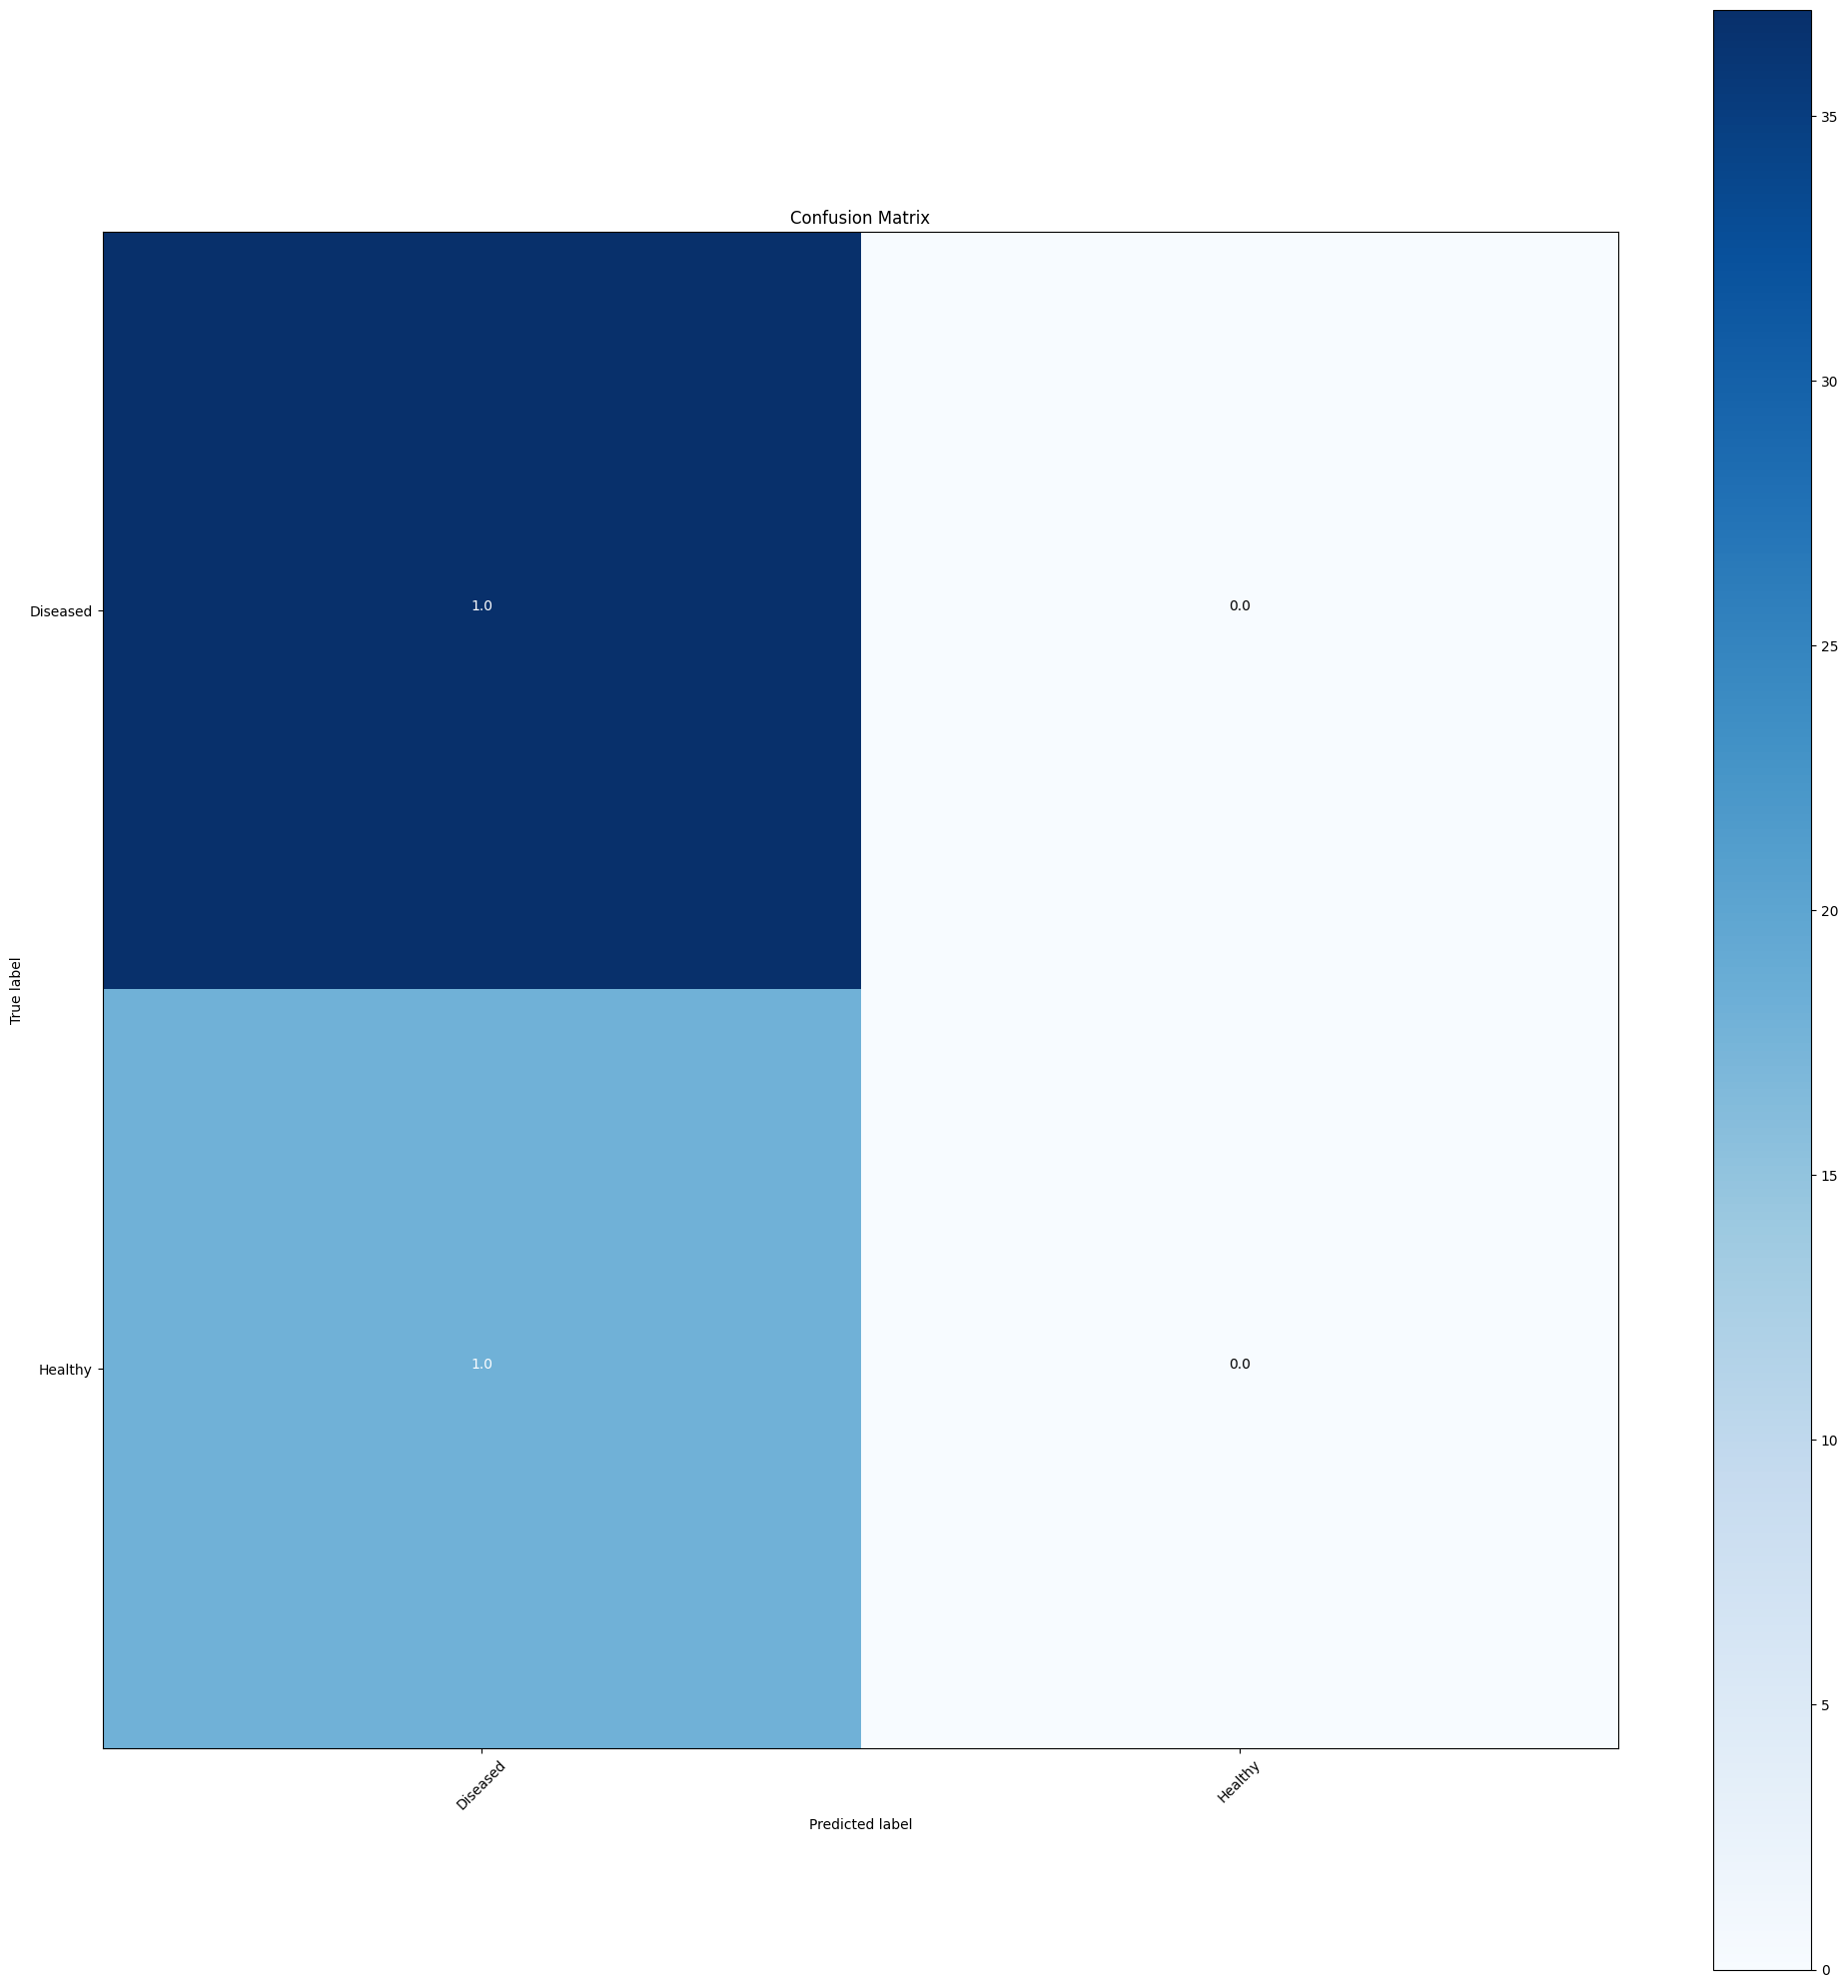

In [16]:
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False

target_names = []
for key in train_images.class_indices:
    target_names.append(key)

#Confution Matrix
Y_pred = model.predict(test_images)
y_pred = (Y_pred>0.5).astype(int)
print('Confusion Matrix')
cm = confusion_matrix(test_images.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

#Print Classification Report
print('Classification Report')
print(classification_report(test_images.classes, y_pred, target_names=target_names))